In [1]:
from src import Pipeline, Plotter
from src.utils.read import load_data
import numpy as np
import pandas as pd

In [2]:
X, ids = load_data('spleen')
pipe = Pipeline(X, config=f"configs/config.ini", verbose=True, col_ids=ids)
plotter = Plotter(pipe)
pipe.run()

PCA: Knee found at 12 components. Using n=12.
INFO:Cluster:Initializing KMeans.
INFO:Cluster.multiple:Running multiple threads with n_jobs=-1.
INFO:Cluster.multiple:Clustering with k=3. Score=1291.75.
INFO:Cluster.multiple:Clustering with k=4. Score=1314.50.
INFO:Cluster.multiple:Clustering with k=5. Score=1384.31.
INFO:Cluster.multiple:Clustering with k=6. Score=1333.01.
INFO:Cluster.multiple:Clustering with k=7. Score=1358.63.
INFO:Cluster.multiple:Clustering with k=8. Score=1360.56.
INFO:Cluster.multiple:Finished clustering. Best score achieved for k=5.
TTest: Using 300 markers.
TTest: Running marker discovery in parallel.
TTest: Finished finding markers.
HyperGeom: Finished finding lvl1 types.
HyperGeom: Finished finding lvl2 types.


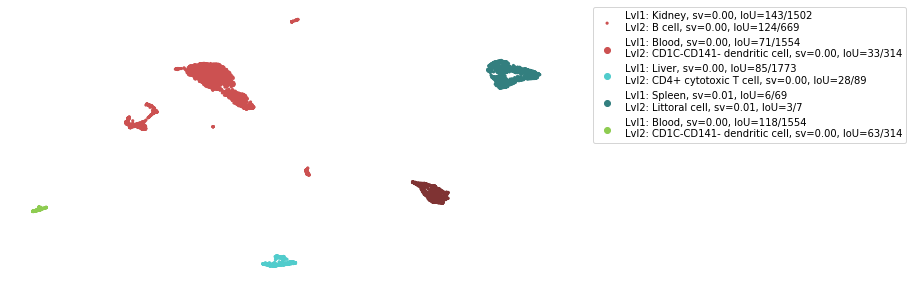

In [3]:
plotter.plot_clu()